In [ ]:
import requests
import json
import pandas as pd

api_key = '1ZxcVL8gBZIFARcf1f9lOR4SZsK1lTSF'

ticker = 'ASME.AS'
data_type = 'historical-price-full'

url = f"https://financialmodelingprep.com/api/v3/{data_type}/{ticker}?apikey={api_key}"

r = requests.get(url)
data = r.json()

In [ ]:
list(data.keys()) != ['symbol','historical']
url

In [ ]:
data.keys()

In [ ]:
def request_is_good(json_r):
    b_return = False
    req_keys = list(json_r.keys())
    if req_keys == ['symbol','historical']:
        b_return = True

    return b_return

In [ ]:
request_is_good(data)

In [ ]:
import os
pp='c:\\Users\\top kek\\Desktop\\Python\\2_External APIs\\market data\\'
os.listdir(pp)

In [ ]:
path = 'c:\\Users\\top kek\\Desktop\\Python\\2_External APIs\\market data\\'
ticker = "ADBE"
df_temp = pd.read_csv(path + ticker + '.csv')
df_temp = df_temp.set_index('date')
df_temp = df_temp[['adjClose']]
df_temp.rename(columns={'adjClose': ticker}, inplace=True)
market_data = df_temp

print(market_data)

In [ ]:
import scipy.stats as stats
import seaborn as sns
rvs = stats.norm(loc=0, scale=1)
normal_sample = rvs.rvs(size=1000)
sns.set()
sns.distplot(normal_sample)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_logreturns = market_data.apply(np.log)-market_data.shift(1).apply(np.log)
df_logreturns.dropna(inplace=True)
real_sample = np.array(df_logreturns['ADBE'])

stats.probplot(real_sample, dist="norm", plot=plt)

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns

# Step 2: Generate or load your data
# For example, let's generate a sample dataset
data = np.random.normal(0, 1, 1000)

# Step 3: Calculate skewness and kurtosis
data_skewness = skew(data)
data_kurtosis = kurtosis(data, fisher=False)  # Use Pearson's definition of kurtosis

# Step 4: Plot the Cullen and Frey graph
plt.figure(figsize=(10, 8))

# Plot the point for the data
plt.scatter(data_kurtosis, data_skewness**2, color='blue', label='Data', zorder=5)

# Label axes
plt.xlabel('Kurtosis')
plt.ylabel('Squared Skewness')
plt.title('Cullen and Frey Graph')

# Plot theoretical distributions
# Normal distribution
plt.scatter(3, 0, color='green', label='Normal Distribution', zorder=5)

# Exponential distribution
exp_kurtosis = 9
exp_skewness = 2**2
plt.scatter(exp_kurtosis, exp_skewness, color='red', label='Exponential Distribution', zorder=5)

# Beta distribution (skewed)
beta_skewness = np.linspace(0, 4, 100)
beta_kurtosis = 3 + beta_skewness
plt.plot(beta_kurtosis, beta_skewness, label='Beta Distribution', color='orange')

# Gamma distribution
gamma_skewness = np.linspace(0, 5, 100)
gamma_kurtosis = 3 + 6 / (gamma_skewness**2)
plt.plot(gamma_kurtosis, gamma_skewness**2, label='Gamma Distribution', color='purple')

# Chi-squared distribution
chi2_kurtosis = 3 + 12 / (gamma_skewness)
chi2_skewness = 2 / np.sqrt(gamma_skewness)
plt.plot(chi2_kurtosis, chi2_skewness**2, label='Chi-squared Distribution', color='brown')

# Add legend
plt.legend()
plt.grid(True)

# Show plot
plt.show()
plt.savefig('Cullen Frey Graph.png')

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kendalltau, spearmanr, rankdata
from statsmodels.distributions.empirical_distribution import ECDF
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import scatter_2d

# Step 2: Generate or load data
# For example, let's create synthetic data with a known dependence structure
np.random.seed(42)
n_samples = 1000

# Generate data from two correlated normal distributions
data_x = np.random.normal(0, 1, n_samples)
data_y = 0.5 * data_x + np.random.normal(0, 1, n_samples)

data = pd.DataFrame({'X': data_x, 'Y': data_y})

# Step 3: Transform marginals to uniform using empirical CDF
ecdf_x = ECDF(data['X'])
ecdf_y = ECDF(data['Y'])

u_x = ecdf_x(data['X'])
u_y = ecdf_y(data['Y'])

u_data = pd.DataFrame({'U_X': u_x, 'U_Y': u_y})

# Step 4: Fit a Gaussian copula to the transformed data
copula = GaussianMultivariate()
copula.fit(u_data)

# Step 5: Generate samples from the fitted copula
copula_samples = copula.sample(n_samples)

# Step 6: Visualize the results
plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(data['X'], data['Y'], alpha=0.5)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')

# Samples from copula
plt.subplot(1, 2, 2)
scatter_2d(copula_samples, title='Samples from Copula')

plt.show()


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Step 2: Load and prepare financial data
# For example, let's use some synthetic data
np.random.seed(42)
n_days = 1000
returns = np.random.normal(0, 1, n_days)
volatility = np.zeros(n_days)

# Simulate some volatility clustering
for i in range(1, n_days):
    returns[i] += 0.9 * returns[i-1] * np.exp(-returns[i-1]**2)

# Convert to a DataFrame
dates = pd.date_range(start='2020-01-01', periods=n_days)
data = pd.DataFrame({'Returns': returns}, index=dates)

# Step 3: Plot the time series and returns
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Returns'], label='Returns')
plt.title('Simulated Financial Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Step 4: Estimate volatility using GARCH model
# Fit a GARCH(1, 1) model
garch_model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Step 5: Visualize the volatility clustering
data['Volatility'] = garch_fit.conditional_volatility

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Returns'], label='Returns', alpha=0.5)
plt.plot(data.index, data['Volatility'], label='Estimated Volatility', color='red')
plt.title('Volatility Clustering in Financial Returns')
plt.xlabel('Date')
plt.ylabel('Returns / Volatility')
plt.legend()
plt.show()

In [ ]:
from ReturnProfile import asset_performance
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

eq = asset_performance("ADSK")

min_x = min(eq.real_sample)
max_x = max(eq.real_sample)
x_theo = np.linspace(min_x,max_x,90)

plt.plot(stats.norm.cdf(x_theo, eq.mean_log_return, eq.vola))




In [ ]:
import pandas as pd
from ReturnProfile import asset_performance
eq = asset_performance("ADSK")

In [ ]:
df_vwap = pd.merge(eq.df_prices,eq.df_volumes,left_index=True, right_index=True, how='left')
df_vwap.columns = ['p','q']
n = eq.dict_quick_stats['observation period (days)']
vwap_range = 30
df_vwap['vwap'] = None
# li_vwap = []

for i in range(1,n-vwap_range):
            
    df_temp = df_vwap.iloc[i:i+vwap_range]
    df_temp['weights'] = df_temp.q / df_temp.q.sum()
    vwap = (df_temp.p * df_temp.weights).sum()
    df_vwap['vwap'].iloc[i-1] = vwap

    # li_vwap.append(vwap)

df_vwap

In [ ]:

li_vwap

In [ ]:
import pandas as pd
from ReturnProfile import asset_performance
eq = asset_performance("ADBE")
df_test = eq.df_stats

In [ ]:
import matplotlib.pyplot as plt
df_hist = pd.pivot_table(df_test, values=['date'], columns=['bin'], aggfunc='count').T
float(list(range(3)))/4

In [ ]:
import scipy.stats as stats
rvs = stats.norm(loc=1, scale=2)
rvs

In [ ]:
import scipy.stats as stats
rvs = stats.norm(loc=0, scale=1)
lst_array = list(rvs.rvs(size=100))
sorted(lst_array)

In [ ]:
import numpy as np
np.linspace(-1,1,10)

In [1]:
import pandas as pd
from ReturnProfile import asset_performance
eq = asset_performance("ADSK")

{'mean': log_return   -0.001918
dtype: float64, 'vola': log_return    0.014139
dtype: float64, 'skew': log_return   -2.960569
dtype: float64, 'kurt': log_return    17.174896
dtype: float64, 'std': log_return    0.022908
dtype: float64, 'observation period (days)': 96}


c:\Users\ashve\Desktop\Projects\ReturnProfile.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['weights'] = df_temp['volume'] / df_temp['volume'].sum()
c:\Users\ashve\Desktop\Projects\ReturnProfile.py:153: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_ind

{'mean': log_return   -0.000597
dtype: float64, 'vola': log_return    0.010115
dtype: float64, 'skew': log_return   -0.906084
dtype: float64, 'kurt': log_return    1.993166
dtype: float64, 'std': log_return    0.016388
dtype: float64, 'observation period (days)': 96}


c:\Users\ashve\Desktop\Projects\ReturnProfile.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['weights'] = df_temp['volume'] / df_temp['volume'].sum()
c:\Users\ashve\Desktop\Projects\ReturnProfile.py:153: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_ind

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1900x1200 with 0 Axes>

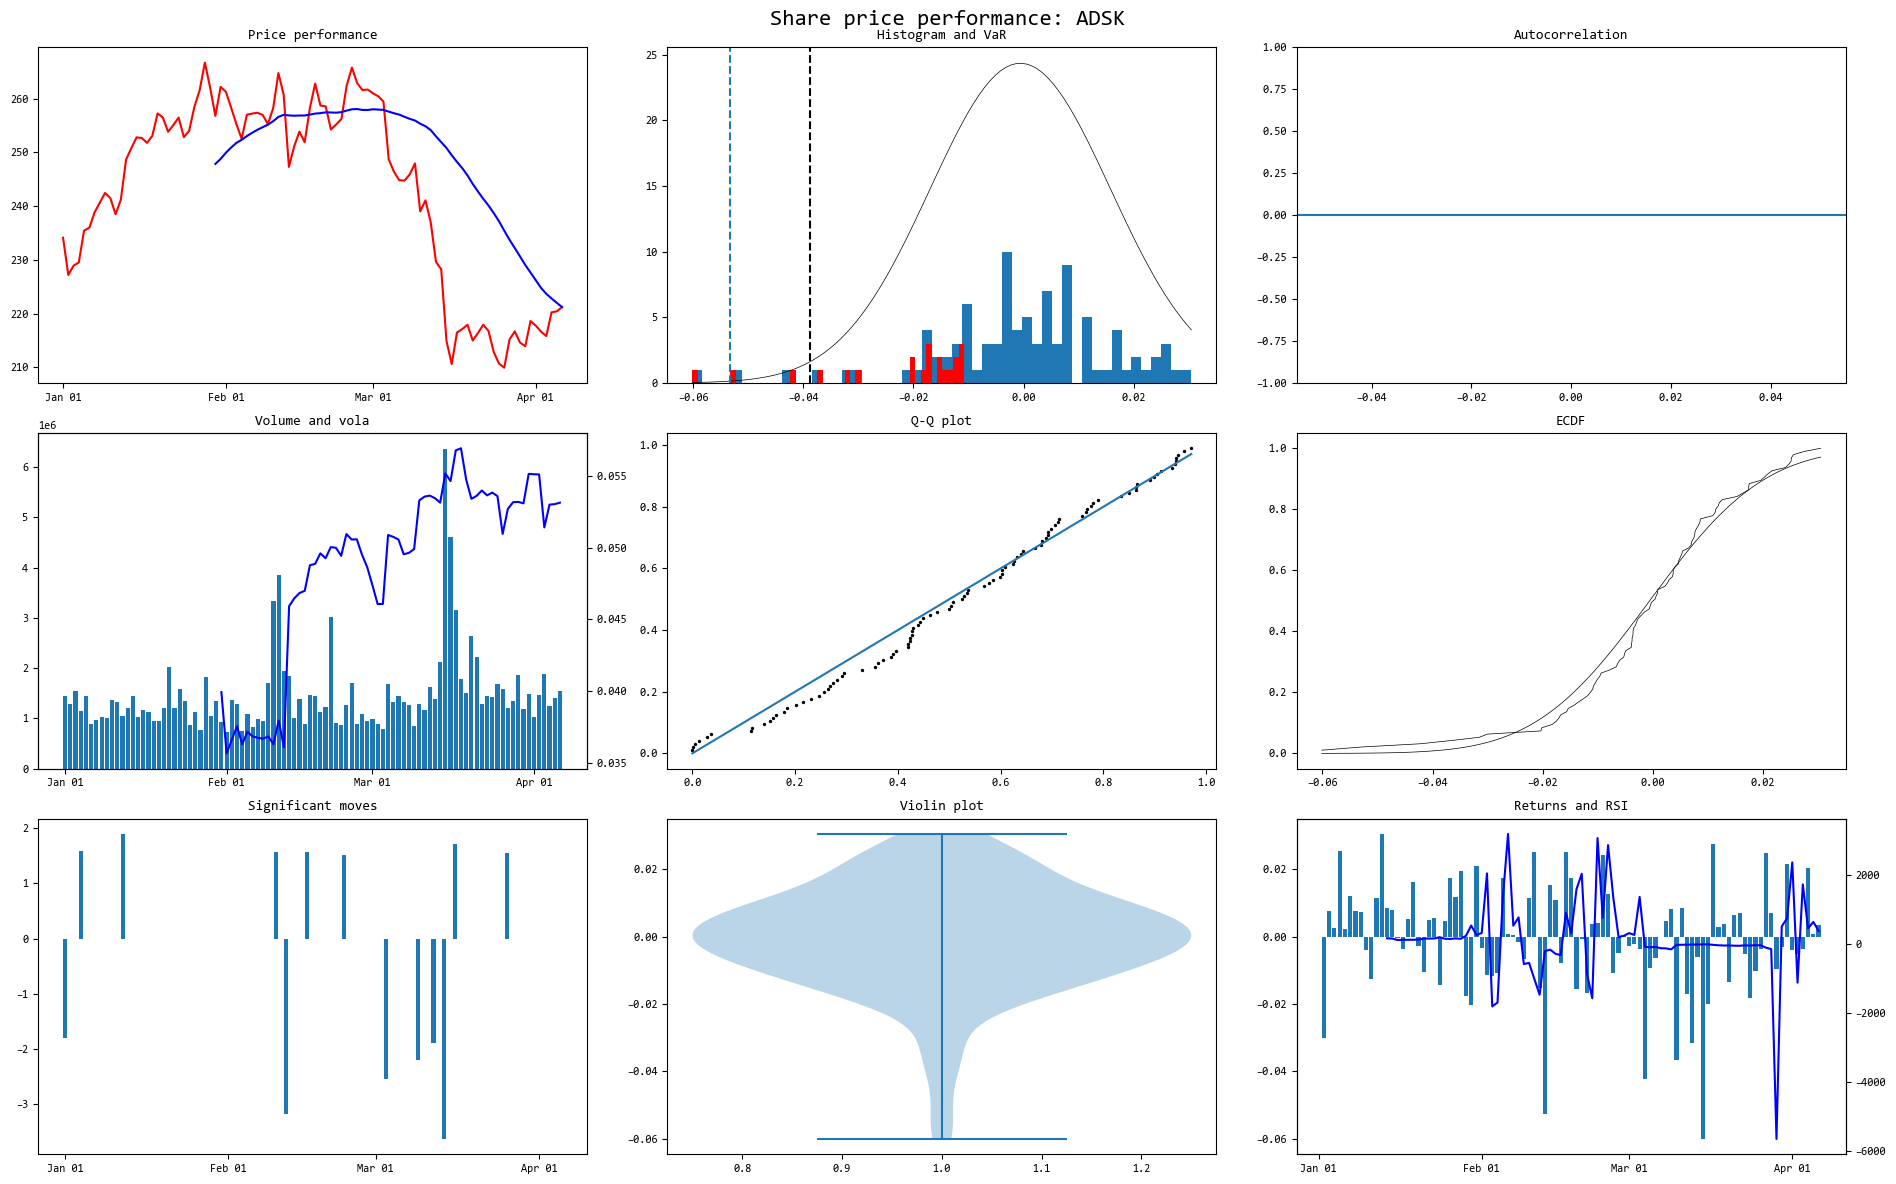

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf

#general settings for the plot

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Consolas'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.titlesize'] = 10  # Title font size
plt.rcParams['axes.labelsize'] = 8  # Axis label font size
plt.rcParams['xtick.labelsize'] = 8  # X-tick label font size
plt.rcParams['ytick.labelsize'] = 8  # Y-tick label font size
plt.rcParams['figure.figsize'] = [19, 12]

#plt.subplots_adjust(left=1, bottom=1, right=2, top=2, wspace=20, hspace=1)

plt.gcf().autofmt_xdate()

fig, ax = plt.subplots(nrows=3, ncols=3)

fig.suptitle('Share price performance: ' + eq.ticker, fontsize=16)
#plt.figure(figsize=(30,30))

# plot price and moving average
df_plot1 = eq.df_analysis[['close','ma30d']].sort_index(ascending=True)
u_x = df_plot1.index
u_y1 = df_plot1.iloc[:,0]
u_y2 = df_plot1.iloc[:,1]

ax[0,0].plot(u_y1,'r')
ax[0,0].plot(u_y2,'b')
ax[0,0].set_title('Price performance')
ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# plot volume and vola

df_plot2 = eq.df_analysis[['volume','vola30d']].sort_index(ascending=True)
u_x = df_plot2.index
u_y1 = df_plot2.iloc[:,0]
u_y2 = df_plot2.iloc[:,1]

ax[1,0].bar(u_x,u_y1)
ax[1,0].twinx().plot(u_y2,'b')
ax[1,0].set_title('Volume and vola')
ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# plot significant moves

df_plot3 = eq.df_stats[['date','significant_move']].sort_index(ascending=True)
df_plot3.reset_index(inplace=True)
df_plot3.set_index(df_plot3['date'],inplace=True)
df_plot3.sort_index(ascending=True, inplace=True)

u_x = df_plot3.index
u_y1 = df_plot3.iloc[:,2]

ax[2,0].bar(u_x,u_y1)
ax[2,0].set_title('Significant moves')
ax[2,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[2,0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# plot histogram and VaR

df_plot4 = eq.df_stats['log_return']

# plot log returns
u_x = df_plot4.index
u_y1 = df_plot4

ax[0,1].hist(u_y1,bins = 50)

# plot recent log returns (1 Month)
arr_L1M_returns = np.array(df_plot4.iloc[0:21])
ax[0,1].hist(arr_L1M_returns,bins = 50, color = "red")

# plot the normal distribution on top
x_min = df_plot4.min()
x_max = df_plot4.max()
n = len(df_plot4)
mean = eq.dict_quick_stats['mean']
scale = eq.dict_quick_stats['std']

x = np.linspace(x_min,x_max,n)
p = stats.norm.pdf(x, mean,scale)
ax[0,1].plot(x, p, 'k', linewidth=0.5)

# add empirical VaR
emp_VaR = np.percentile(df_plot4, 1)
ax[0,1].axvline(emp_VaR, linestyle='dashed')

# add theoretical VaR
theo_VaR = stats.norm.ppf(0.01, loc=mean, scale=scale)
ax[0,1].axvline(theo_VaR, linestyle='dashed', color="black")

ax[0,1].set_title('Histogram and VaR')


# chart a Q-Q plot

df_plot5 = eq.df_stats[['percentile','theo_percentile']]

u_x = df_plot5['theo_percentile']
u_y1 = df_plot5['theo_percentile']
u_y2 = df_plot5['percentile']

ax[1,1].plot(u_x,u_y1)
ax[1,1].scatter(u_x,u_y2,s=2, color = "black")
ax[1,1].set_title('Q-Q plot')


# chart a violin plot

df_plot6 = eq.df_stats['log_return']

ax[2,1].violinplot(df_plot6)
ax[2,1].set_title('Violin plot')


# chart an ACF

df_plot7 = eq.df_analysis['log_return']

plot_acf(df_plot7,ax = ax[0,2])


# chart cdf

df_plot8 = eq.df_stats[['log_return','ecdf']]

# theoretical
x = np.linspace(x_min,x_max,n) #see chart above
p = stats.norm.cdf(x, mean,scale)
ax[1,2].plot(x, p, 'k', linewidth=0.5)

# empirical
u_x = df_plot8.iloc[:,0]
u_y = df_plot8.iloc[:,1]
ax[1,2].plot(u_x, u_y, 'k', linewidth=0.5)

ax[1,2].set_title('ECDF')


# chart some technical indicator (rsi as a placeholder)

df_plot9 = eq.df_analysis[['log_return','rsi']].sort_index(ascending=True)

u_x = df_plot9.index
u_y1 = df_plot9.iloc[:,0]
u_y2 = df_plot9.iloc[:,1]

ax[2,2].bar(u_x,u_y1)
ax[2,2].twinx().plot(u_y2,'b')
ax[2,2].set_title('Returns and RSI')
ax[2,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[2,2].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.tight_layout()
plt.show